# Оглавление
1. [Общая Информация](#Шаг_1)
2. [Графическое представление](#Шаг_2)
3. [Проверка гипотезы](#Шаг_3)

<a name="Шаг_1"></a>

# Общая Информация

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

#### Импорт файлов

In [57]:
query_1 = pd.read_csv('query_1.csv')
query_3 = pd.read_csv('query_3.csv')
query_last = pd.read_csv('query_last.csv')

#### изучить данные / типы данных на корректность

In [58]:
query_1.head(3)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630


In [59]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Nan, дублей нет. Данные корректны. Тип данных не меняю, все нормально

In [60]:
query_3.head(3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290


In [61]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [62]:
query_3.shape

(101, 2)

In [63]:
query_3.average_flights.describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Nan, дублей нет, нулей нет. Данные корректны. Тип данных не меняю, все нормальною Очень большой максимум

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000766204FBB0>]],
      dtype=object)

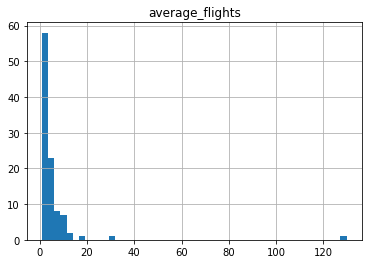

In [64]:
query_3.hist(bins = 50)

Выброс, надо убрать.

значение третьего квартиля + 2,5 * 3

In [65]:
query_3 = query_3[query_3.average_flights <= 9.98]

In [66]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [67]:
query_3.average_flights.describe()

count    93.000000
mean      3.477734
std       2.225421
min       1.000000
25%       2.000000
50%       3.000000
75%       4.580645
max       9.612903
Name: average_flights, dtype: float64

Нижнюю границу не трогаю

In [68]:
query_last.head(5)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [69]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [70]:
query_last['festival_week'] = query_last['festival_week'].fillna('0')

In [71]:
query_last['festival_week'] = query_last['festival_week'].astype('int')

festival_week тип поменял на int

In [72]:
query_last['festival_name'] = query_last['festival_name'].fillna('other')

пропуски заменил на other

In [73]:
query_last.describe()

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,10.000000
mean,34.50000,50670.400000,9.700000
std,3.02765,2502.752716,15.691824
min,30.00000,43568.000000,0.000000
25%,32.25000,51364.500000,0.000000
50%,34.50000,51439.000000,0.000000
75%,36.75000,51596.750000,22.500000
max,39.00000,51675.000000,36.000000


#### Топ 10 городов по количеству рейсов

In [74]:
top_10_city = query_3.sort_values(by = 'average_flights', ascending = False).head(10)

In [75]:
top_10_city = top_10_city.reset_index()

In [76]:
top_10_city.drop('index', axis = 1)

,city,average_flights
0,Сочи,9.612903
1,Ульяновск,9.580645
2,Советский,9.000000
3,Сургут,8.741935
4,Ханты-Мансийск,8.419355
5,Новый Уренгой,8.290323
6,Казань,7.741935
7,Тюмень,6.967742
8,Челябинск,6.709677
9,Хабаровск,6.548387


<a name="Шаг_2"></a>

### Графики

#### график «Модели самолётов и количество рейсов»

In [77]:
query_1.sort_values(by = 'flights_amount', ascending =False).head()

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630


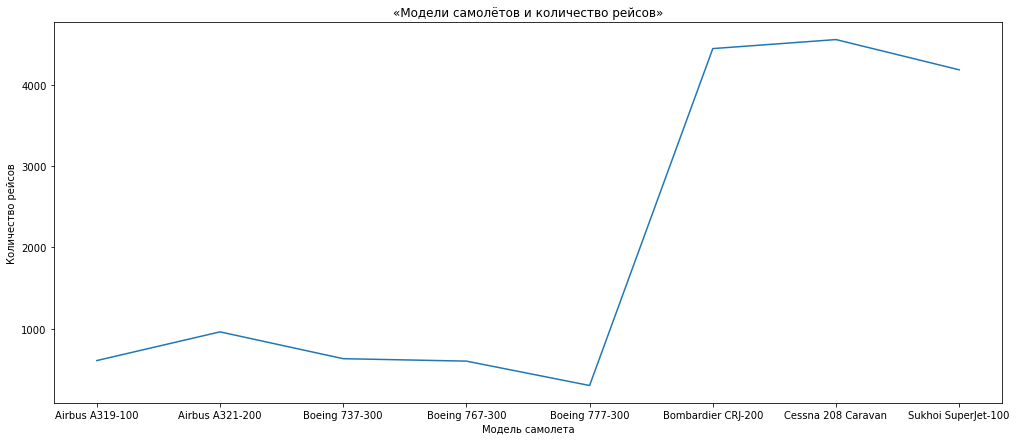

In [78]:
plt.figure(figsize=(17, 7))
plt.title("«Модели самолётов и количество рейсов»")
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")
plt.plot(query_1.model, query_1.flights_amount)
plt.show()

#### Вывод
При внутренних перевозках компания F9 доверет в большей степени трем моделям(с заметным отрывом)


    Cessna 208 Caravan	4557
    Bombardier CRJ-200	4446
    Sukhoi SuperJet-100	4185
___

#### график «Города и количество рейсов»

In [79]:
query_3 = query_3.sort_values(by = 'average_flights', ascending =True)

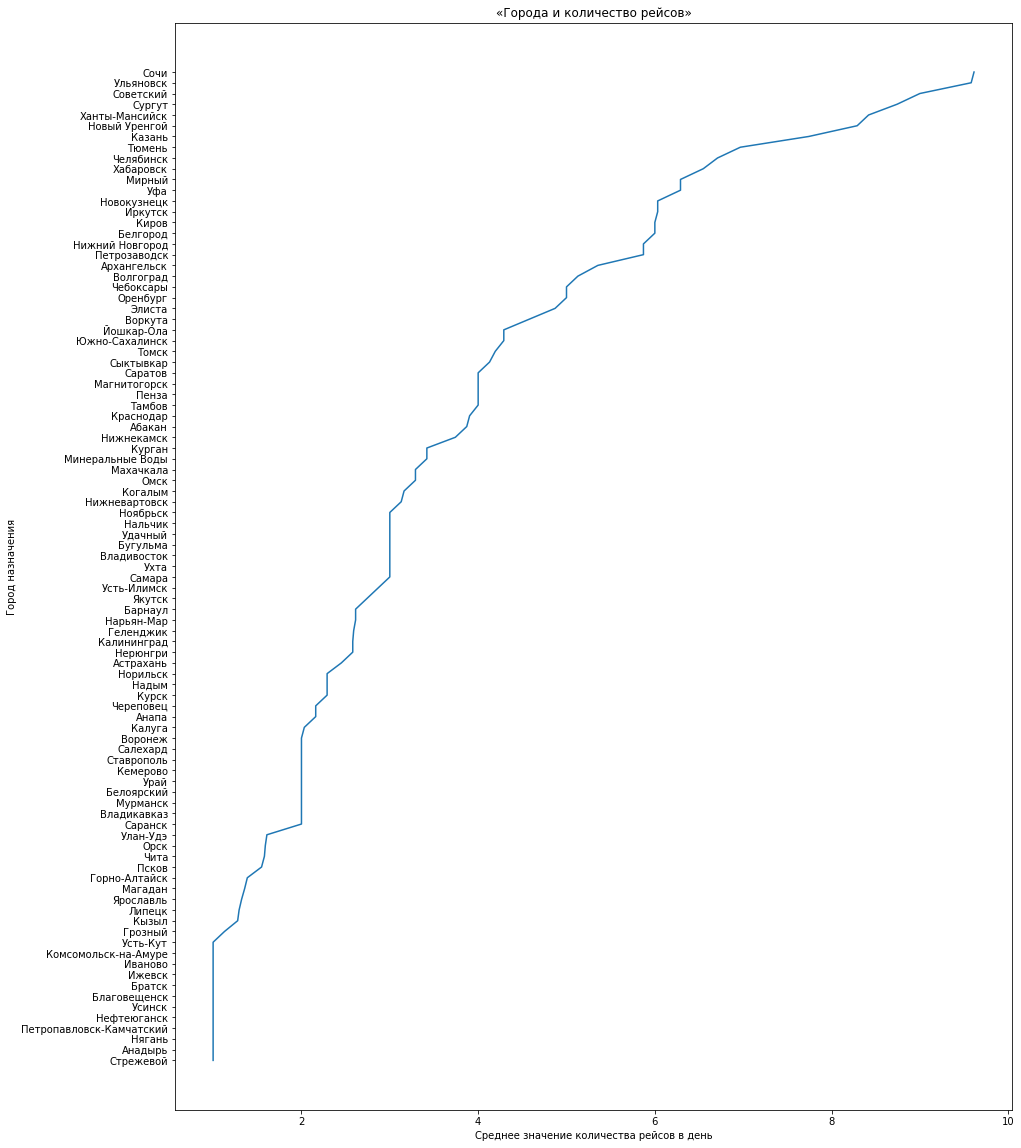

In [80]:
plt.figure(figsize=(15, 20))
plt.title("«Города и количество рейсов»")
plt.xlabel("Cреднее значение количества рейсов в день")
plt.ylabel("Город назначения")
plt.plot(query_3.average_flights, query_3.city)
plt.show()

#### Вывод
Внутренние перелеты неравноомерны. Есть популярные маршруты, есть не популярные.
___

#### график «Топ-10 городов и количество рейсов»

In [81]:
top_10_city = top_10_city.drop('index', axis = 1)

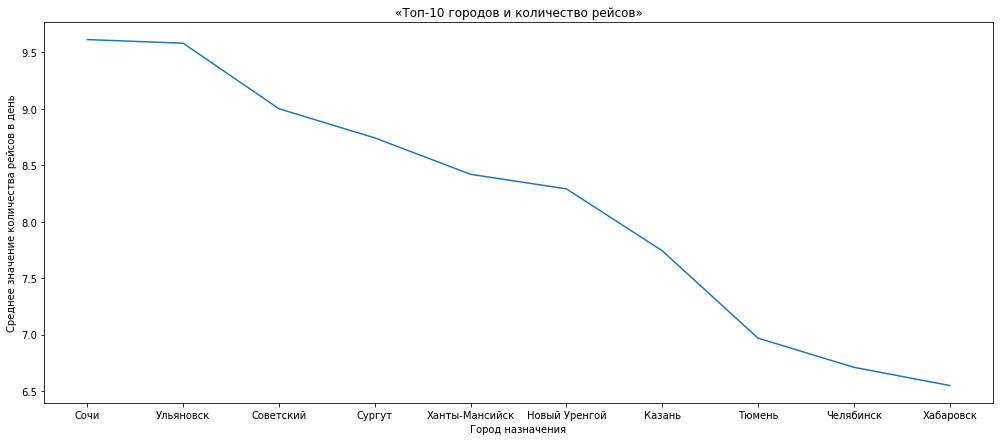

In [91]:
plt.figure(figsize=(17, 7))
plt.title("«Топ-10 городов и количество рейсов»")
plt.xlabel("Город назначения")
plt.ylabel("Cреднее значение количества рейсов в день")
plt.plot(top_10_city.city, top_10_city.average_flights)
plt.show()

#### Вывод
В продолжение к предыдущему графику, даже на топ 10 городах заметна разница почти на треть между топ городом (Сочи) и Хабаровском.
___

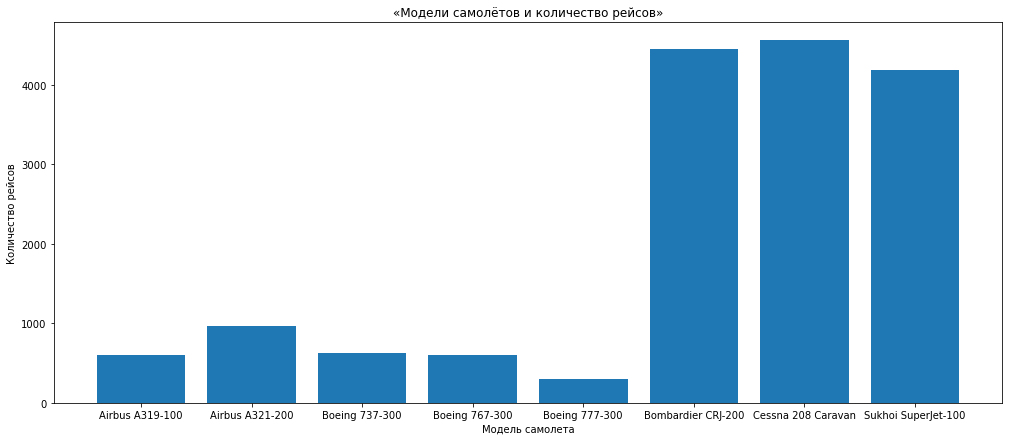

In [92]:
plt.figure(figsize=(17, 7))
plt.title("«Модели самолётов и количество рейсов»")
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")
plt.bar(query_1.model, query_1.flights_amount)
plt.show()

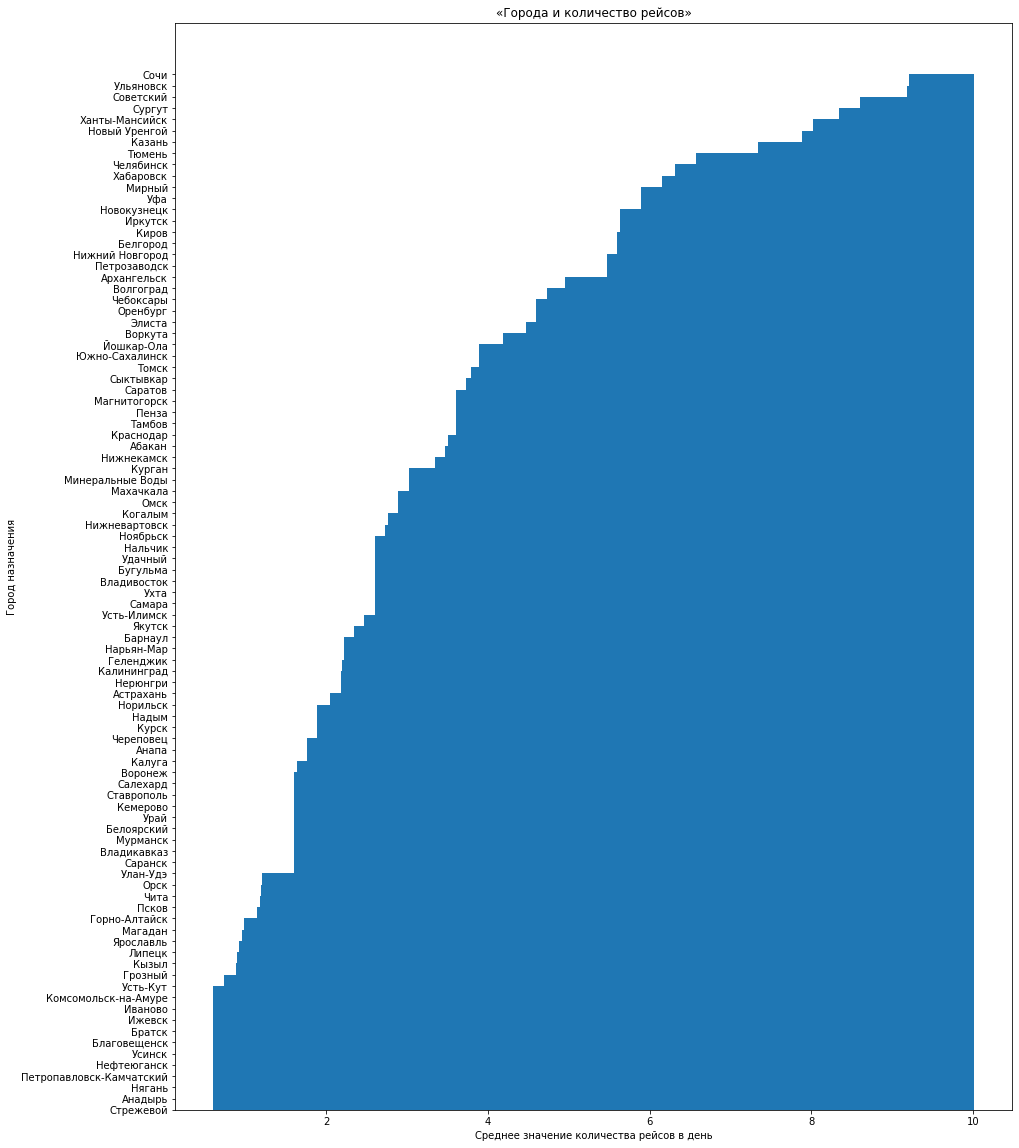

In [93]:
plt.figure(figsize=(15, 20))
plt.title("«Города и количество рейсов»")
plt.xlabel("Cреднее значение количества рейсов в день")
plt.ylabel("Город назначения")
plt.bar(query_3.average_flights, query_3.city)
plt.show()

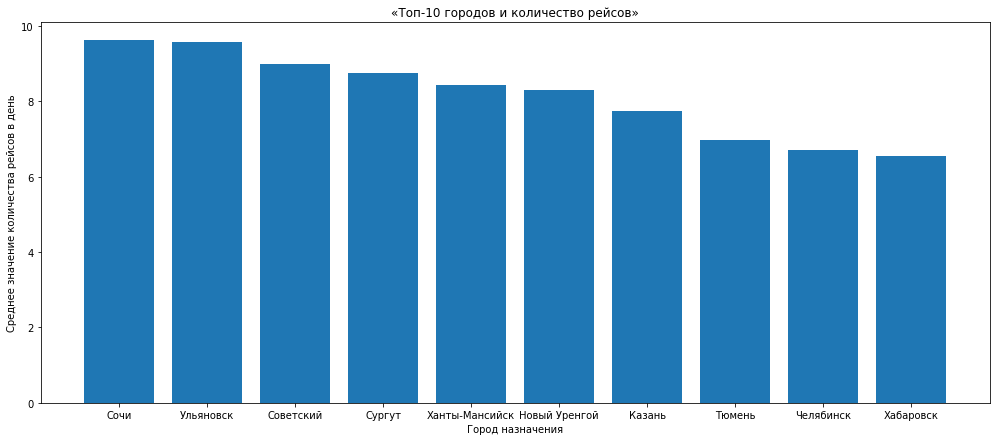

In [94]:
plt.figure(figsize=(17, 7))
plt.title("«Топ-10 городов и количество рейсов»")
plt.xlabel("Город назначения")
plt.ylabel("Cреднее значение количества рейсов в день")
plt.bar(top_10_city.city, top_10_city.average_flights)
plt.show()

На графиках «Модели самолётов и количество рейсов» и «Топ-10 городов и количество рейсов» Bar - гистограмма более показательна

<a name="Шаг_3"></a>

# Проверка гипотезы

### Формулировка
#### Нулевая гипотеза:
##### Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время
#### Альтернативная гипотеза:
##### Средний спрос на билеты во время фестивалей не равен среднему спросу на билеты в обычное время

Нулевя гипотеза формулировалась из расчета равенства двух величин, альтернативная, наоборот. Сравнение будет происходить между наличием фестиваля в Москве и его отсутствием.

In [95]:
query_last.head(3)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,other


Общепринятые пороговые значения — 5% и 1%

In [96]:
alpha = 0.05

критический уровень статистической значимости

In [97]:
moscow_fest = query_last[query_last.festival_name != 'other']
other_fest = query_last[query_last.festival_name == 'other']

In [98]:
results = st.mannwhitneyu(
    moscow_fest.ticket_amount,
    other_fest.ticket_amount)

In [99]:
print('p-значение:', results.pvalue)

p-значение: 0.03412374418900064


In [100]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


#### Вывод
##### Рузультат показывает, что "Отвергаем нулевую гипотезу"
Пользуемся альтернативной гипотезой
Следовательно. Средний спрос на билеты во время фестивалей НЕ равен среднему спросу на билеты в обычное время.